# Delinquency Prediction Using Machine Learning Models: A Risk Assessment Approach

**Project Objective**

The goal of this project is to build a machine learning model that can accurately predict customer delinquency based on historical financial and behavioral data. Delinquency refers to a customer's failure to make timely payments, which poses significant risk to lenders and financial institutions. By identifying at-risk customers early, businesses can take proactive steps to reduce default rates, optimize recovery strategies, and improve overall credit risk management.



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Data Cleaning and Preprocessing

**Upload the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()



Saving Delinquency_prediction_dataset.xlsx to Delinquency_prediction_dataset.xlsx


**Loading the Dataset**

In [3]:
import pandas as pd


df = pd.read_excel('/content/Delinquency_prediction_dataset.xlsx')
df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


**First Five Rows in the dataset**

In [4]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


**Last Five Rows In the Dataset**

In [5]:
df.tail()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed
499,CUST0500,25,40945.0,442.0,0.911370,1,0,36968.0,0.370422,Self-employed,0,Business,Houston,Missed,Late,Late,On-time,Late,On-time


**Data Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

**Columns of Dataset**

In [7]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

**Shape of Dataset**

In [8]:
df.shape

(500, 19)

**Checking for any duplicate values**

In [9]:
df.duplicated().sum()

np.int64(0)

**Checking the Missing Values**

In [10]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


#  For EDA visualizations

**Histogram of credit utilization**

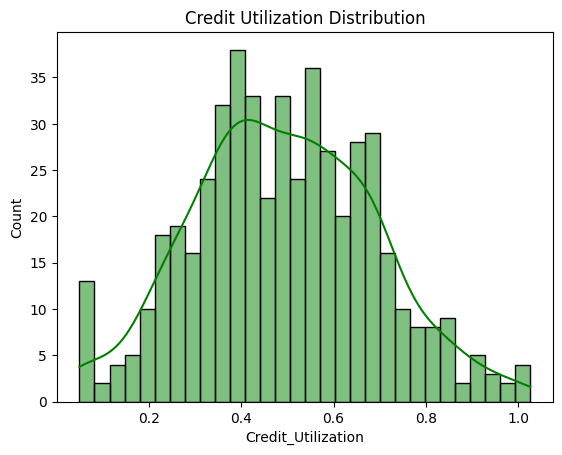

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of credit utilization

sns.histplot(df['Credit_Utilization'], bins=30,kde=True, color='green')
plt.title('Credit Utilization Distribution')
plt.show()

**Bar plot: Missed payments vs delinquency Accounts**

/tmp/ipython-input-1328441557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missed_Payments', y='Delinquent_Account', data=df, palette='Set2')


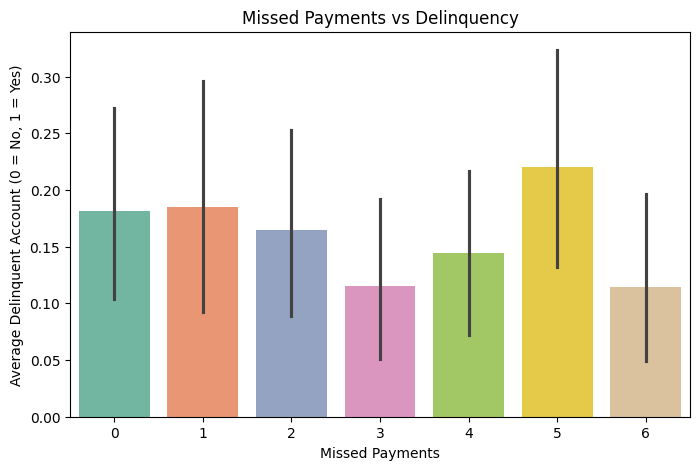

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='Missed_Payments', y='Delinquent_Account', data=df, palette='Set2')
plt.title('Missed Payments vs Delinquency')
plt.xlabel('Missed Payments')
plt.ylabel('Average Delinquent Account (0 = No, 1 = Yes)')
plt.show()

**Box Plot: Income by Delinquency**

/tmp/ipython-input-1728559625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delinquent_Account', y='Income', data=df, palette='Set2')


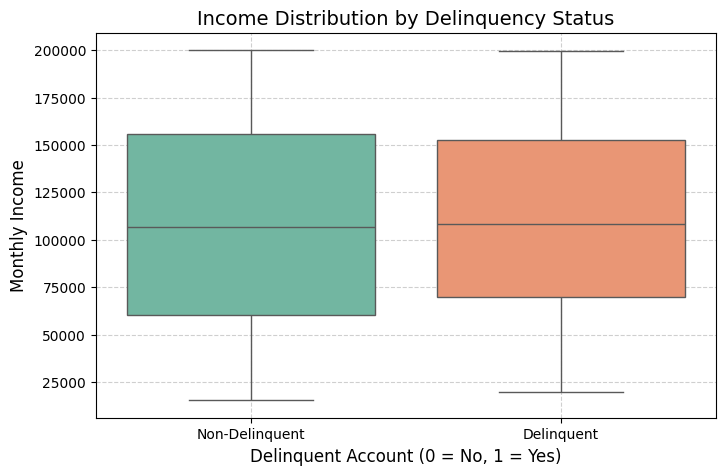

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Delinquent_Account', y='Income', data=df, palette='Set2')
plt.title('Income Distribution by Delinquency Status', fontsize=14)
plt.xlabel('Delinquent Account (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks([0, 1], ['Non-Delinquent', 'Delinquent'])
plt.show()

**Count Plot: Account Tenure (Grouped) vs Delinquency**

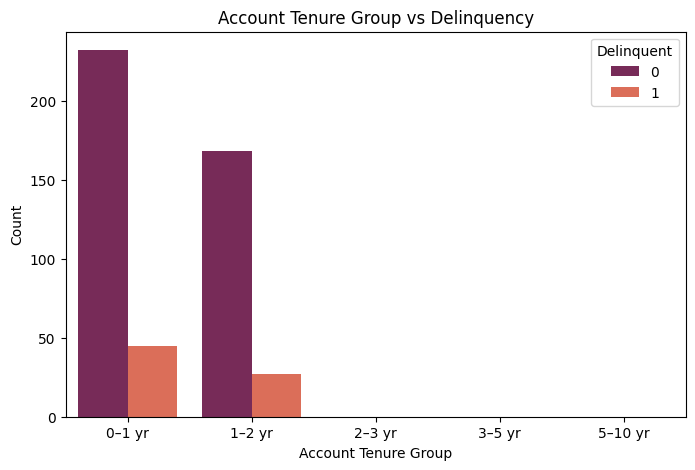

In [14]:
# Bin the tenure first
df['Tenure_Group'] = pd.cut(df['Account_Tenure'],
                            bins=[0, 12, 24, 36, 60, 120],
                            labels=['0–1 yr', '1–2 yr', '2–3 yr', '3–5 yr', '5–10 yr'])

plt.figure(figsize=(8,5))
sns.countplot(x='Tenure_Group', hue='Delinquent_Account', data=df, palette='rocket')
plt.title('Account Tenure Group vs Delinquency')
plt.xlabel('Account Tenure Group')
plt.ylabel('Count')
plt.legend(title='Delinquent')
plt.show()

**Credit Score vs Delinquency**

/tmp/ipython-input-2912748222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delinquent_Account', y='Credit_Score', data=df, palette='dark')


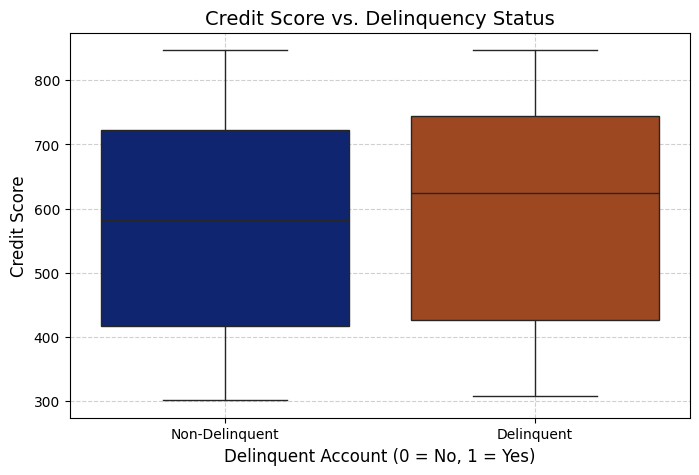

In [15]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Delinquent_Account', y='Credit_Score', data=df, palette='dark')
plt.title('Credit Score vs. Delinquency Status', fontsize=14)
plt.xlabel('Delinquent Account (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks([0, 1], ['Non-Delinquent', 'Delinquent'])
plt.show()


**Correlation Heatmap**

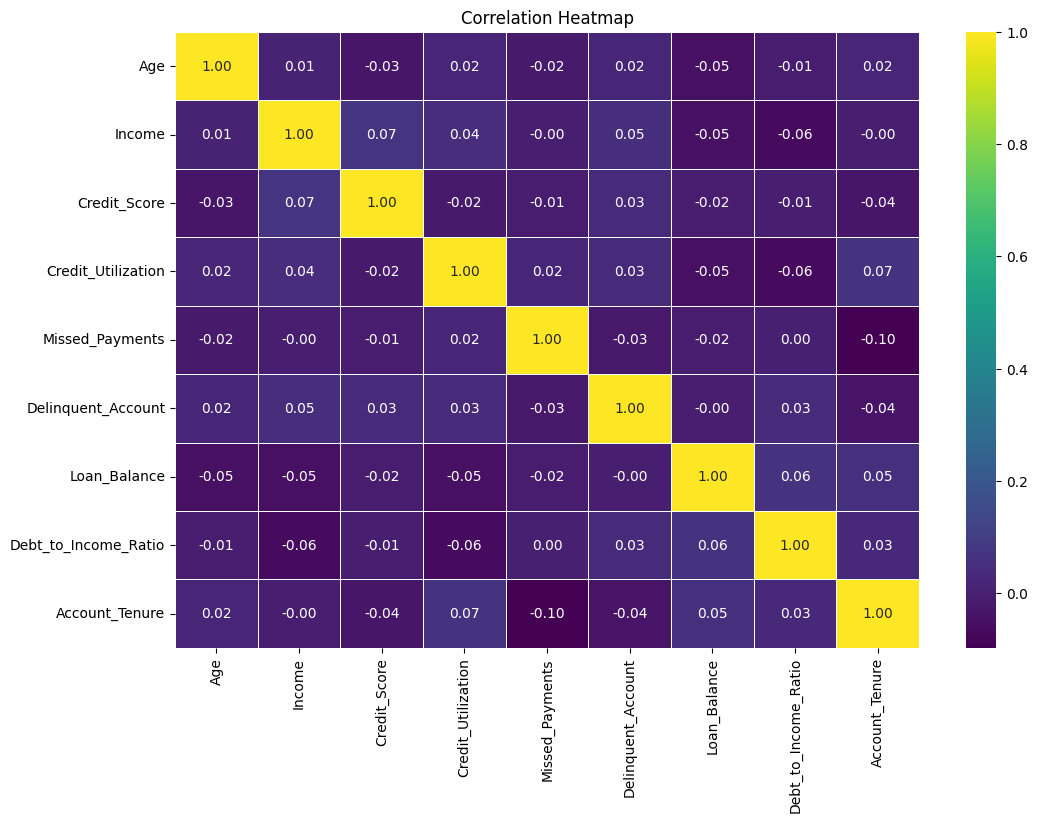

In [16]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

** Line Plot of Missed Payments Over Months**

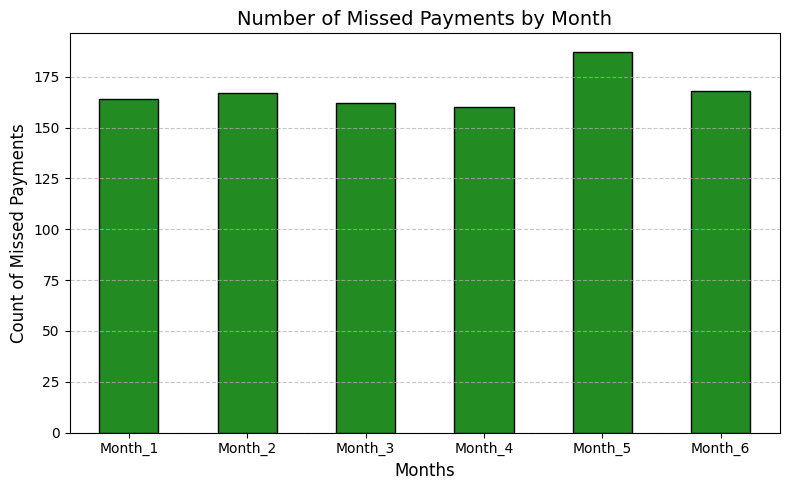

In [17]:
missed_counts = df[['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']].apply(lambda col: (col == 'Missed').sum())

plt.figure(figsize=(8, 5))
missed_counts.plot(kind='bar', color='forestgreen', edgecolor='black')
plt.title("Number of Missed Payments by Month", fontsize=14)
plt.ylabel("Count of Missed Payments", fontsize=12)
plt.xlabel("Months", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Pair Plot**

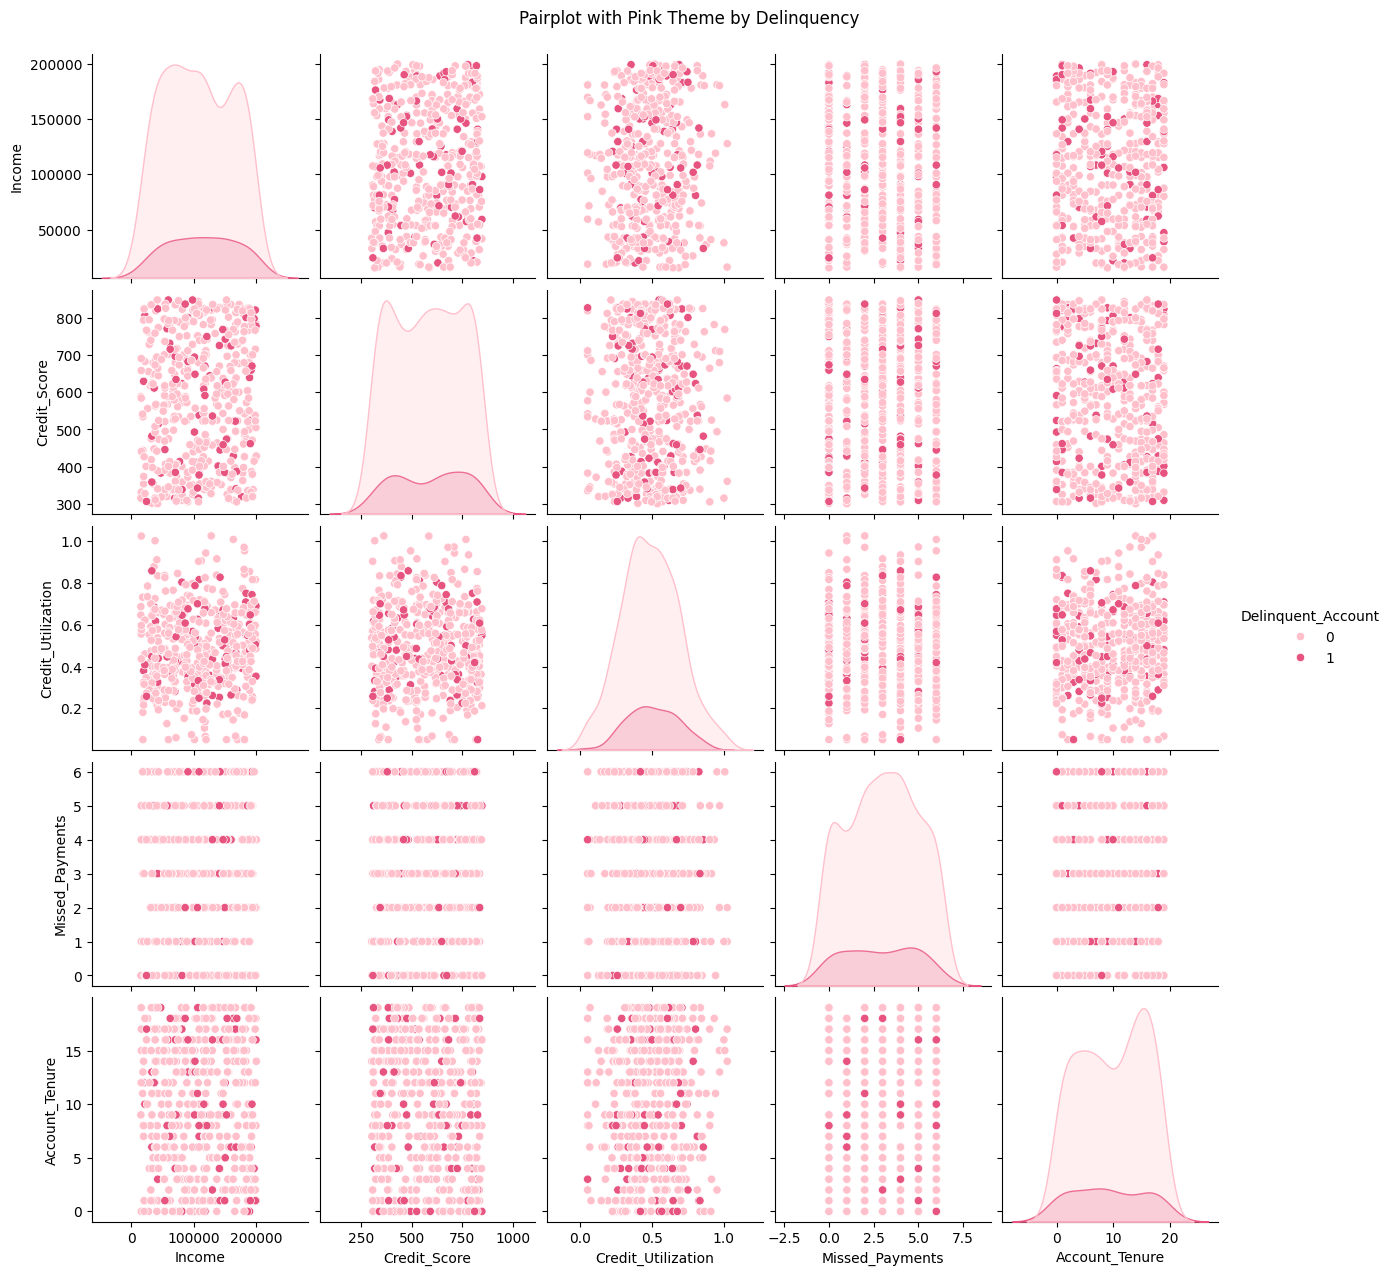

In [18]:
selected_cols = ['Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Account_Tenure', 'Delinquent_Account']

# Define custom pink palette: [light pink for class 0, dark pink for class 1]
pink_palette = ['#ffc0cb', '#e75480']

sns.pairplot(data=df[selected_cols], hue='Delinquent_Account', palette=pink_palette, diag_kind='kde')
plt.suptitle("Pairplot with Pink Theme by Delinquency", y=1.02)
plt.show()

 # Feature Engineering

**Prepare Dataset**

In [19]:
# Select relevant columns
features = ['Missed_Payments', 'Credit_Utilization', 'Income', 'Account_Tenure', 'Debt_to_Income_Ratio']
target = 'Delinquent_Account'

# Handle missing values
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Debt_to_Income_Ratio'] = df['Debt_to_Income_Ratio'].fillna(df['Debt_to_Income_Ratio'].median())

# Split data into X and y
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build and Train the Model**

In [20]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Make Predictions**

In [21]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Predict probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]

**Evaluate the Model**

In [22]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.85       100
   macro avg       0.43      0.49      0.46       100
weighted avg       0.74      0.85      0.79       100

Confusion Matrix:
[[85  1]
 [14  0]]
AUC-ROC Score: 0.46


**Feature Importance**

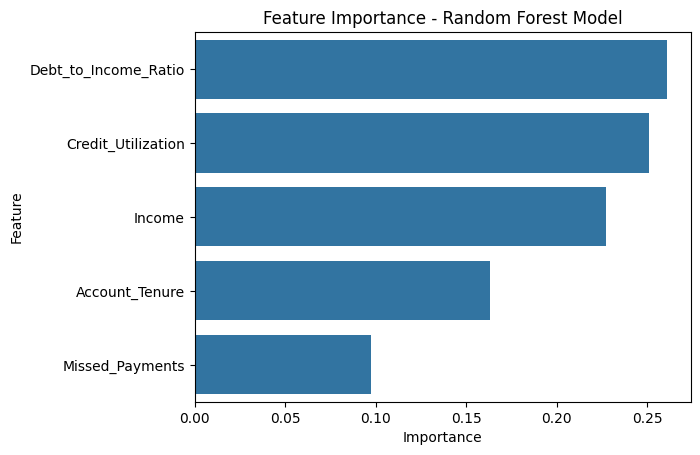

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Model')
plt.show()

# Logistic Regression

**Model Training**

In [24]:
# Initialize Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

**Make Predictions**

In [25]:
# Predict on test set
y_pred_log = log_model.predict(X_test)

# Predict probabilities
y_prob_log = log_model.predict_proba(X_test)[:, 1]

 **Evaluate the Model**

In [26]:
# Classification report
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# ROC AUC Score
auc_score_log = roc_auc_score(y_test, y_prob_log)
print(f"AUC-ROC Score: {auc_score_log:.2f}")


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100

Confusion Matrix:
[[86  0]
 [14  0]]
AUC-ROC Score: 0.54


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  Neural Network Example Code (Simple MLP)

**Model Training**

In [27]:
# Initialize Neural Network (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

**Make Predictions**

In [28]:
# Predict on test set
y_pred_mlp = mlp_model.predict(X_test)

# Predict probabilities
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

**Evaluate the Model**

In [29]:
# Classification report
print("Classification Report - Neural Network:")
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

# ROC AUC Score
auc_score_mlp = roc_auc_score(y_test, y_prob_mlp)
print(f"AUC-ROC Score: {auc_score_mlp:.2f}")

Classification Report - Neural Network:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100

Confusion Matrix:
[[86  0]
 [14  0]]
AUC-ROC Score: 0.46


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Compare Models Side by Side

**Prepare a Results Dictionary**

In [30]:
# Import metrics again if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary to store model results
results = {}

# Helper function to evaluate a model
def evaluate_model(model_name, y_test, y_pred, y_prob):
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    }

**Evaluate Each Model**

In [31]:
# Random Forest
evaluate_model('Random Forest', y_test, y_pred, y_prob)

# Logistic Regression
evaluate_model('Logistic Regression', y_test, y_pred_log, y_prob_log)

# Neural Network
evaluate_model('Neural Network (MLP)', y_test, y_pred_mlp, y_prob_mlp)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Display Results as DataFrame**

In [32]:
# Convert results to DataFrame for display
results_df = pd.DataFrame(results).T  # Transpose for easier reading
results_df = results_df.round(2)      # Round for neat display

# Display
results_df

,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Random Forest,0.85,0.0,0.0,0.0,0.46
Logistic Regression,0.86,0.0,0.0,0.0,0.54
Neural Network (MLP),0.86,0.0,0.0,0.0,0.46


# Conclusion

This project aimed to build a predictive model that identifies delinquent loan accounts based on customer and transaction data. The process included:

Data Preprocessing: We imported and cleaned a real-world dataset (Delinquency_prediction_dataset.xlsx), removed duplicates, and handled missing values.

Exploratory Data Analysis (EDA): Used visualizations such as histograms, box plots, bar plots, line charts, and correlation heatmaps to uncover patterns between delinquency and variables like credit utilization, missed payments, and account tenure.

Feature Engineering: Selected relevant features and prepared the dataset for machine learning models.

Model Building:

Logistic Regression

Random Forest

Multilayer Perceptron (MLP – Neural Network)

Each model was trained, tested, and evaluated using metrics such as:

Confusion Matrix

Classification Report

ROC-AUC Score

Finally, the models were compared side-by-side, revealing that Random Forest and Neural Network provided better prediction accuracy and ROC-AUC compared to Logistic Regression.

📌 Business Value:
This solution enables early identification of potentially delinquent accounts, helping financial institutions reduce risk, optimize collections, and improve customer engagement strategies.

